# Projet:Customer Churn (Article 2)

# Partie 1 : Exploration de la base de données

## Analyse de forme

### 1-Importation des bibliothèques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2-Importation des données

In [2]:
data=pd.read_excel('Telco_customer_churn.csv.xlsx')
data

FileNotFoundError: [Errno 2] No such file or directory: 'Telco_customer_churn.csv.xlsx'

In [ ]:
df=data.copy()

### 3-Dimension de la base de donnée Telco_Customer_Churn

In [3]:
print("Les dimensions de la bade de données sont : " )
print(" * Nonmbre de lignes est :", df.shape[0] )
print(" * Nonmbre de colonnes est :", df.shape[1] )

Les dimensions de la bade de données sont : 


NameError: name 'df' is not defined

### 4-Types de variables dans la base de données

In [5]:
print(df.dtypes)
df.dtypes.value_counts()
#Notre base de données comporte des variables quantitative et qualitative

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object


object     24
int64       6
float64     3
dtype: int64

### 5-Valeurs nuls

<AxesSubplot:>

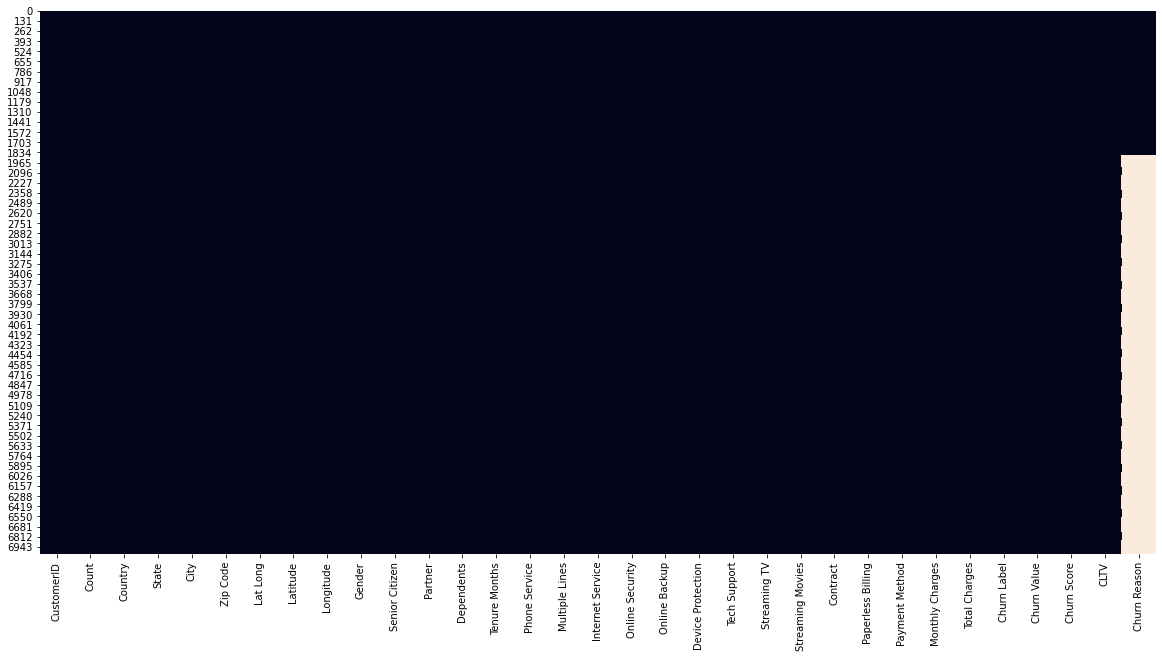

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)
#affficher les données manquantes (ou il y a du blanc on a des données manquantes)

In [7]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)#pourcentages des valeurs nulles ordonées
# On verifie l'existance des valeurs nulles
#En effet la variable Churn reseason contient 5174 Valeur nuls

CustomerID           0.00000
Churn Score          0.00000
Churn Value          0.00000
Churn Label          0.00000
Total Charges        0.00000
Monthly Charges      0.00000
Payment Method       0.00000
Paperless Billing    0.00000
Contract             0.00000
Streaming Movies     0.00000
Streaming TV         0.00000
Tech Support         0.00000
Device Protection    0.00000
Online Backup        0.00000
Online Security      0.00000
CLTV                 0.00000
Internet Service     0.00000
Phone Service        0.00000
Tenure Months        0.00000
Dependents           0.00000
Partner              0.00000
Senior Citizen       0.00000
Gender               0.00000
Longitude            0.00000
Latitude             0.00000
Lat Long             0.00000
Zip Code             0.00000
City                 0.00000
State                0.00000
Country              0.00000
Count                0.00000
Multiple Lines       0.00000
Churn Reason         0.73463
dtype: float64

##### Probleme de la colonne Totals Charges

In [8]:
t=len(df[df['Total Charges'] == " "])#on voit pas ce probleme avec sum() car Total charges est type object 
print(t)

11


In [9]:
df.drop(df[df['Total Charges'] == " "].index, inplace=True)#suppression des cases vides 
df['Total Charges'] = df['Total Charges'].astype('float64')#conversion de Total charges 
#en float car il etait initallement de type object

### 6-unicité des features

In [10]:
for col in df.columns:
    if df[col].dtype=='O':
        print(col)
        print(df[col].unique())
        
### Verifier l'unicité des contenus des variables de types Objet 

CustomerID
['3668-QPYBK' '9237-HQITU' '9305-CDSKC' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']
Country
['United States']
State
['California']
City
['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Tulelake'
 'Olympic Valley' 'Redcrest']
Lat Long
['33.964131, -118.272783' '34.059281, -118.30742' '34.048013, -118.293953'
 ... '41.813521, -121.492666' '39.191797, -120.212401'
 '40.363446, -123.835041']
Gender
['Male' 'Female']
Senior Citizen
['No' 'Yes']
Partner
['No' 'Yes']
Dependents
['No' 'Yes']
Phone Service
['Yes' 'No']
Multiple Lines
['No' 'Yes' 'No phone service']
Internet Service
['DSL' 'Fiber optic' 'No']
Online Security
['Yes' 'No' 'No internet service']
Online Backup
['Yes' 'No' 'No internet service']
Device Protection
['No' 'Yes' 'No internet service']
Tech Support
['No' 'Yes' 'No internet service']
Streaming TV
['No' 'Yes' 'No internet service']
Streaming Movies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'Two year' 'One year']
Paperless Billing
['Yes' 

Remarque :
La base de données contient des colonnes non informatives par rapport au phenomene de desabonnement telques:
CustomerID, Count(toutes les valeurs sont à 1), Country(Tous USA), State(Tous California),zip Code ,Lat Long ,Latitude, Longitude , Churn Label (Equivalante à Churn Value),Churn Reason

## Analyse de fond

### 1. Visulation initiale - Elimination des colonnes inutiles

In [11]:
df = df.drop(['CustomerID', 'Count', 'Country','State', 
              'Zip Code', 'Lat Long','Churn Label', 'Churn Reason', 
              'Lat Long', 'Latitude', 'Longitude','City','CLTV','Churn Score'], axis=1)
#Suppression des colonnes non informatives

In [12]:
#for col in df.select_dtypes('object'):
  #  a=len(df[df[col] == " "])
   # print(a)
#on a plus de valeurs nulles
#for col in df.select_dtypes('int64'):
  #  a=len(df[df[col] == " "])
   # print(a)

In [13]:
missing = df.isnull().sum()
missing[missing > 0].count()
#on a plus de colonnes avec des valeurs manquantes

0

Les colonnes qui restent sont:

In [14]:
df.dtypes

Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges        float64
Churn Value            int64
dtype: object

### 2- Examen de la colonne target

on va appeler les clinets qui ont quitter le dernier mois Churning Customers et autres Non-Churning Customers

In [15]:
df['Churn Value'].value_counts(normalize=True)*100#nomalizepour afficher les resultats en pourcentage

0    73.421502
1    26.578498
Name: Churn Value, dtype: float64

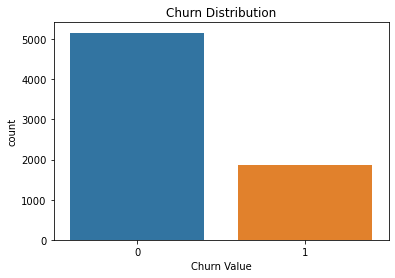

In [16]:
sns.countplot(data=df, x="Churn Value")
plt.title('Churn Distribution')
plt.show()

seulement 26.5% des clients ont quitter le dernier mois donc une une base de données non equilibrée.Donc on devrait 
choisir une  une bonne métrique ,Accuracy dans ce cas n'est plus adaptée.

### 3-Histogrames des valeurs quantitatives

C:\Users\anaconda3\ana2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anaconda3\ana2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


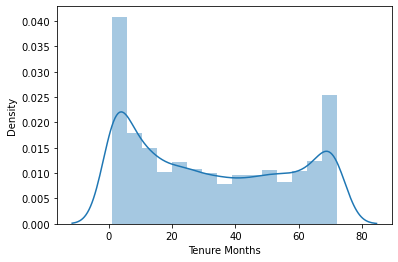

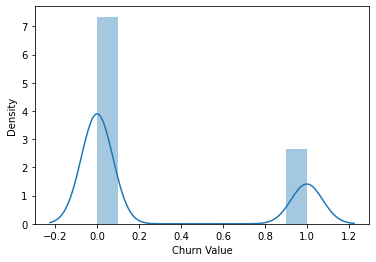

In [17]:
for col in df.select_dtypes('int64'):
    plt.figure()
    sns.distplot(df[col])

C:\Users\anaconda3\ana2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anaconda3\ana2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


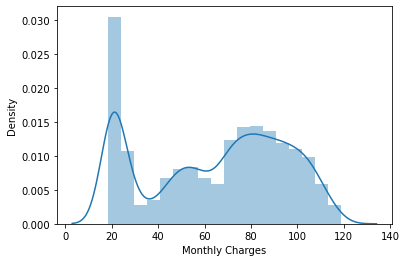

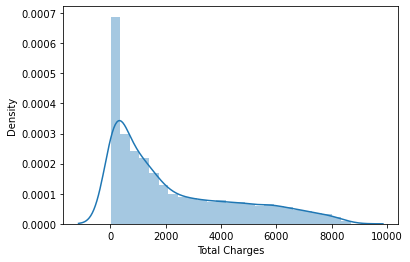

In [18]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

### 4-variables qualitatives

In [19]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

Gender-------------------------------------------- ['Male' 'Female']
Senior Citizen------------------------------------ ['No' 'Yes']
Partner------------------------------------------- ['No' 'Yes']
Dependents---------------------------------------- ['No' 'Yes']
Phone Service------------------------------------- ['Yes' 'No']
Multiple Lines------------------------------------ ['No' 'Yes' 'No phone service']
Internet Service---------------------------------- ['DSL' 'Fiber optic' 'No']
Online Security----------------------------------- ['Yes' 'No' 'No internet service']
Online Backup------------------------------------- ['Yes' 'No' 'No internet service']
Device Protection--------------------------------- ['No' 'Yes' 'No internet service']
Tech Support-------------------------------------- ['No' 'Yes' 'No internet service']
Streaming TV-------------------------------------- ['No' 'Yes' 'No internet service']
Streaming Movies---------------------------------- ['No' 'Yes' 'No internet service'

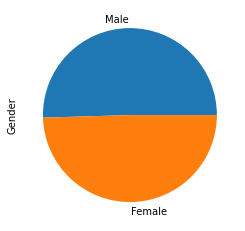

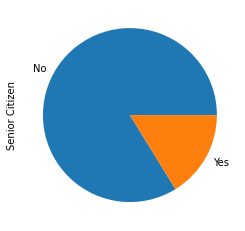

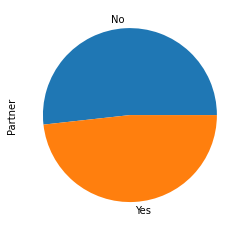

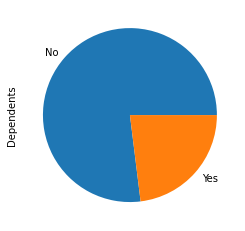

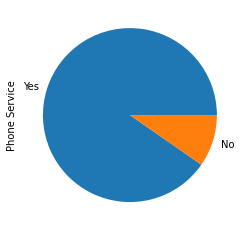

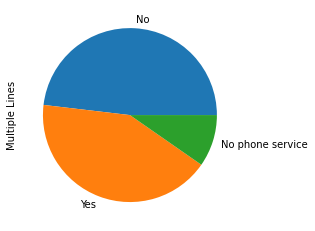

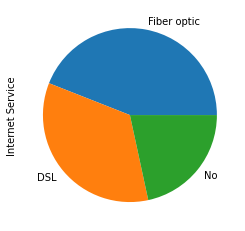

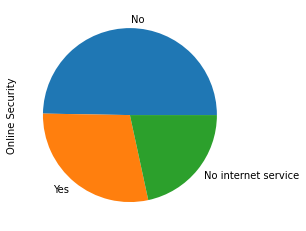

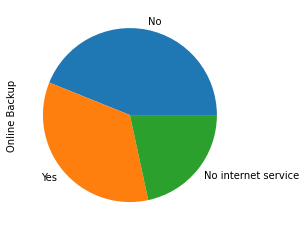

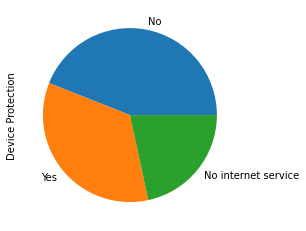

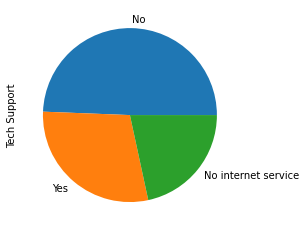

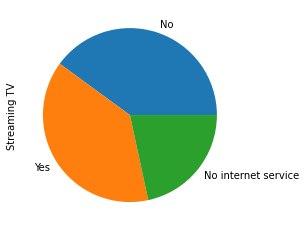

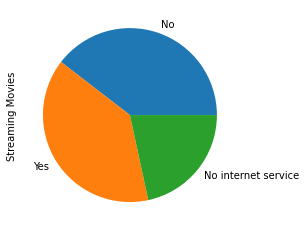

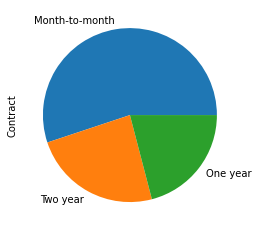

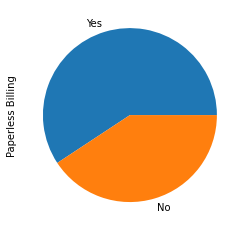

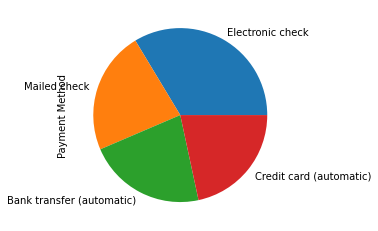

In [20]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

## 5- Relation Target/Variables

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7032 non-null   object 
 1   Senior Citizen     7032 non-null   object 
 2   Partner            7032 non-null   object 
 3   Dependents         7032 non-null   object 
 4   Tenure Months      7032 non-null   int64  
 5   Phone Service      7032 non-null   object 
 6   Multiple Lines     7032 non-null   object 
 7   Internet Service   7032 non-null   object 
 8   Online Security    7032 non-null   object 
 9   Online Backup      7032 non-null   object 
 10  Device Protection  7032 non-null   object 
 11  Tech Support       7032 non-null   object 
 12  Streaming TV       7032 non-null   object 
 13  Streaming Movies   7032 non-null   object 
 14  Contract           7032 non-null   object 
 15  Paperless Billing  7032 non-null   object 
 16  Payment Method     7032 

### a- Variables quantitatives

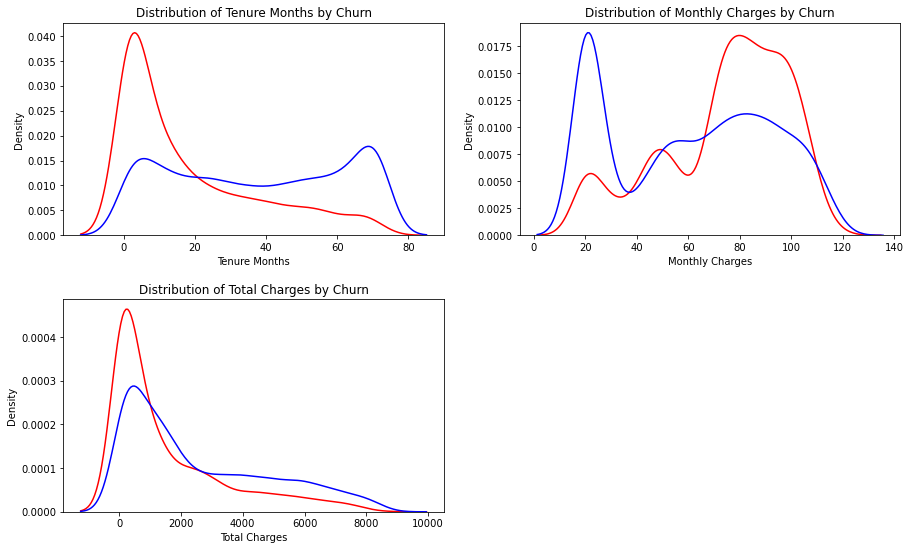

In [22]:
num_features = ['Tenure Months', 'Monthly Charges', 'Total Charges']
fig, ax = plt.subplots(figsize=(15, 9))
ax = [plt.subplot(221), plt.subplot(222), plt.subplot(223)]
plt.subplots_adjust(hspace=0.3)
for i in range(0, len(ax)):
    ax[i].set_title("Distribution of " + num_features[i] + " by Churn")
    ax[i].set_ylabel('Density')
    ax[i].set_xlabel(num_features[i])
    sns.kdeplot(df[df['Churn Value'] == 1][num_features[i]], color= 'red', label= 'Churn Value: 1', ax=ax[i])
    sns.kdeplot(df[df['Churn Value'] == 0][num_features[i]], color= 'blue', label= 'Churn Value: 0', ax=ax[i])
plt.show()

OBSERVATIONS:                                                                                     
                  -  La plus part des Churners ont quitter des les premiers mois de Contract.                                
                   - Il y a des gens qui restent dans cette entreprise depuis environ 70 mois. Mais les clients qui ont enregistré des services auprès de l'entreprise entre 1 et 8 ans sont susceptibles de quitter l'entreprise et de mettre fin aux services.
-Le taux de churn augmente lorsque Monthly charges augmente.
                            
 -La distribution de Total Chages est le resultat des deux autres distributions(Total Charges = Monthly Charges * Tenure Months) 


### b- Varaibles qalitatives:

In [23]:

#fonction qui calcul le taux de churn pour chaque categories
def plotFeature(feature, xoffset, yoffset):
    df1 = df.groupby(feature)["Churn Value"].value_counts().to_frame()
    df1 = df1.rename({"Churn Value": "Count"}, axis=1).reset_index()
    df1["Percentage"] = df1["Count"]/len(df)*100
    
    ax = sns.barplot(x=feature, y="Percentage", hue="Churn Value", data=df1)
    ax.set_title("Churn percentages for each " + feature)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2 - xoffset,
                height - yoffset,
                '{:1.1f}%'.format(height),
                weight='bold', color='white', size = 12) 

#### GENDER - SENIORCITIZEN

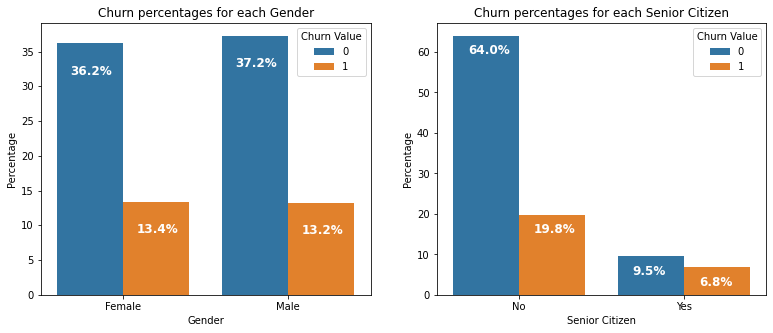

In [24]:
fig, ax = plt.subplots(figsize=(13,5))
plt.subplot(121)
plotFeature("Gender", 0.12, 4.5)
plt.subplot(122)
plotFeature("Senior Citizen", 0.11, 4.5)

plt.show()

OBSERVATIONS:                
-La distribution de Gender est homogéne donc elle n'a pas de relation avec le Churn

-on remarque aussi que lorsque Senir Citzen=No :leur taux de churn est superieur a cuex qui ont Senior Citizen=Yes

#### PARTNER-DEPENDENTS

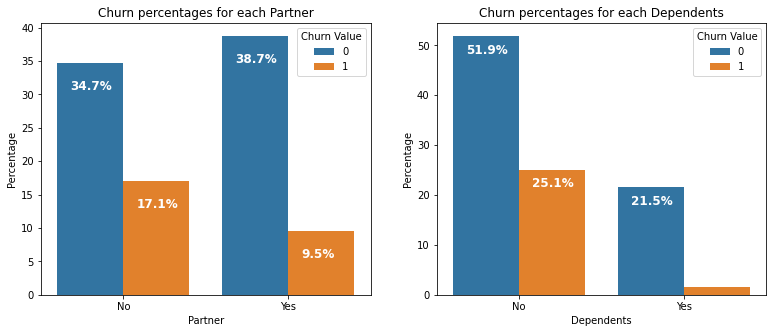

In [25]:
fig, ax = plt.subplots(figsize=(13,5))
plt.subplot(121)
plotFeature("Partner", 0.12, 4)
plt.subplot(122)
plotFeature("Dependents", 0.12, 3.5)
plt.show()

OBSERVATIONS:    
     -on remaque ceux qui n'ont pas de partenaires leur taux de Churn est superieur a ceux qui ont un partenaire                  
                           -les clients qui n'ont pas de dependaces ont un taux de churn superieur 

#### PHONE, INTERNET SERVICE, MULTIPLE LINE

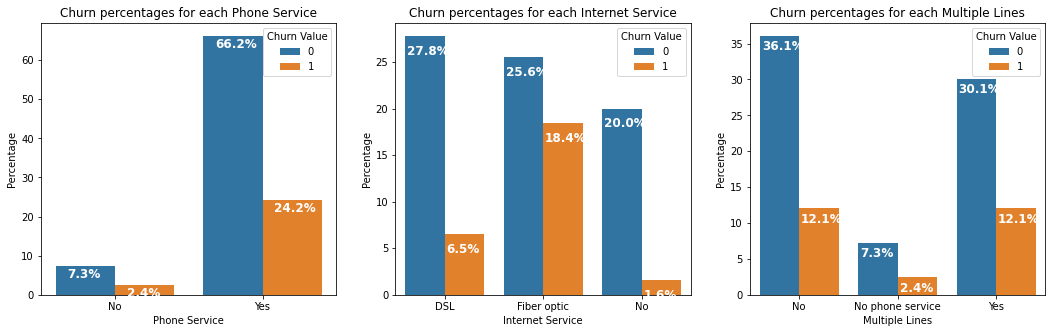

In [26]:
fig, ax = plt.subplots(figsize=(18,5))
plt.subplot(131)
plotFeature("Phone Service", 0.12, 3)
plt.subplot(132)
plotFeature("Internet Service", 0.18, 2)
plt.subplot(133)
plotFeature("Multiple Lines", 0.18, 2)
plt.show()

OBSERVATIONS     
         -les clients qui n'ont pas d'internet on a un taux de Churn inferieur a ceux qui ont acces a internet et les clients qui possedent des fibres
optiques ont le taux de churn le plus élevé

-Multiple Lines n'a pas vraiment d'influence

-les clients qui possedent un Phone sevcice leur taux de Churn est superieur aux autres

#### ONLINE SECURITY, ONLINE BACKUP, DEVICE PROTECTION

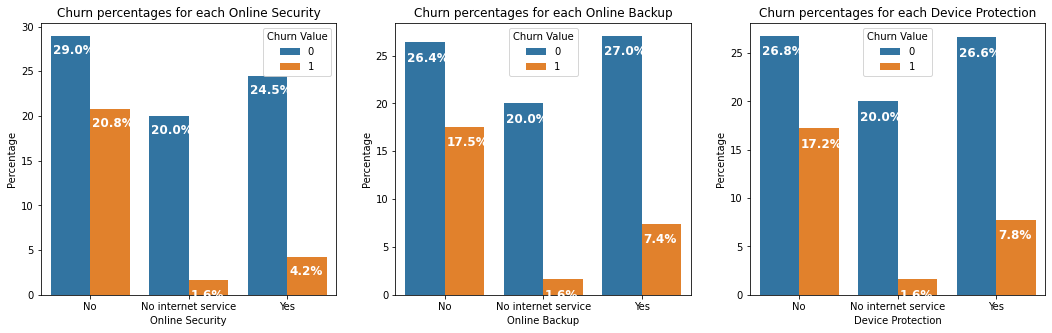

In [27]:
fig, ax = plt.subplots(figsize=(18,5))
plt.subplot(131)
plotFeature("Online Security", 0.18, 2)
plt.subplot(132)
plotFeature("Online Backup", 0.18, 2)
plt.subplot(133)
plotFeature("Device Protection", 0.18, 2)
plt.show()

OBSERVATIONS:      
clients qui ne disposent pas de ces 3 services (Online Security, Online Backup and Device Protection) a quitter

#### TECH SUPPORT, STREAMING TV, STREAMING MOVIES

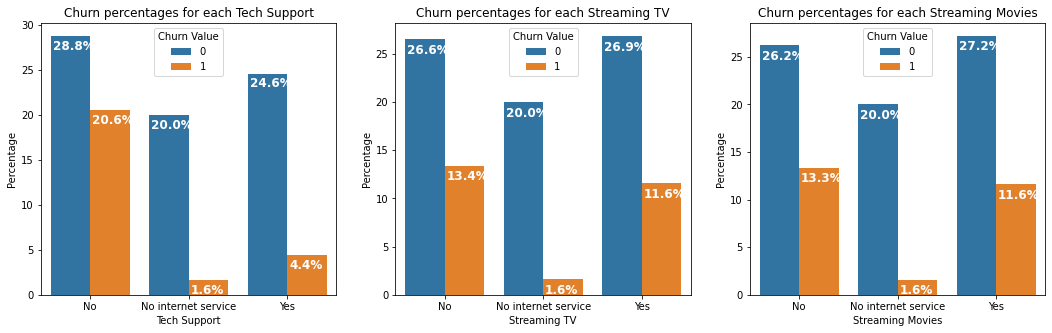

In [28]:
fig, ax = plt.subplots(figsize=(18,5))
plt.subplot(131)
plotFeature("Tech Support", 0.18, 1.5)
plt.subplot(132)
plotFeature("Streaming TV", 0.18, 1.5)
plt.subplot(133)
plotFeature("Streaming Movies", 0.18, 1.5)
plt.show()

OBSERVATIONS:                                                                     
-Les clients qui ne disposent pas d'un support technique sont plus susceptibles a quitter
      
-Le service de streaming Tv ou MOVIES n'est pas prédictif du désabonnement 

#### CONTRACT - PAPERLESS BILLING - PAYMENT METHOD

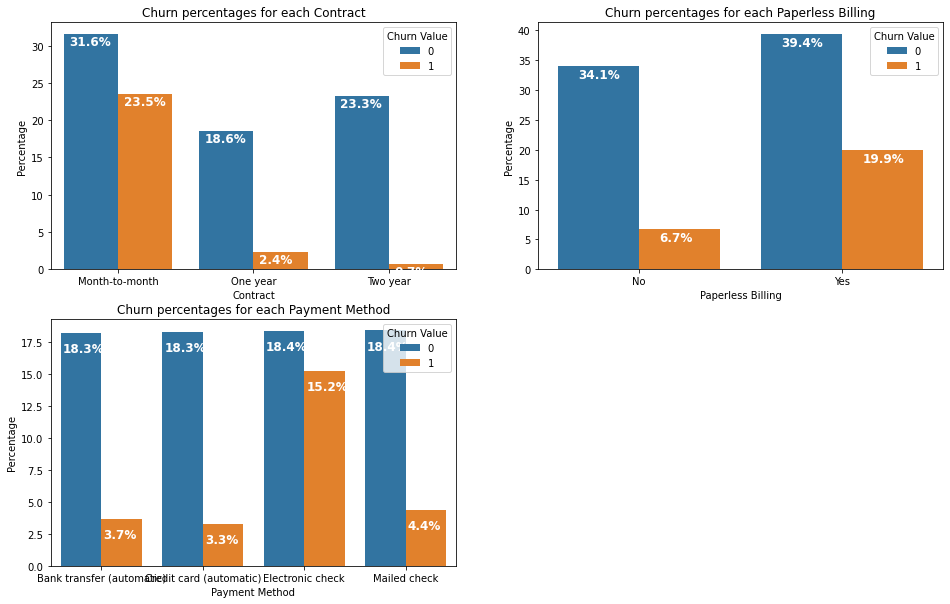

In [29]:
fig, ax = plt.subplots(figsize=(16,10))
plt.subplots_adjust(hspace=0.2)
plt.subplot(221)
plotFeature("Contract", 0.16, 1.5)
plt.subplot(222)
plotFeature("Paperless Billing", 0.1, 2)
plt.subplot(223)
plotFeature("Payment Method", 0.18, 1.5)
plt.show()

OBSERAVTAIONS:

-Les contrats intuitivement à court terme ont un taux de désabonnement beaucoup plus élevé (Contract)

-Les clients avec facturation sans papier ont un taux de désabonnement élevé(Paperless Billing)

-La méthode de paiement du chèque électronique montre un taux de désabonnement beaucoup plus élevé que les autres(Payment Method)

In [30]:
df.shape

(7032, 20)

# Data Pre-processing

## 1-les valeurs extremes:

les variables ne suivent pas une distribution normale donc on peut utiliser la  Methode IQR pour trouver les valerus aberantes (outliers)

In [31]:
for i in num_features:
    #calculer les quartiles
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    #calculer les limites des valeurs aberantes
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    #identifier ces valeurs
    print(((df[i] < lower_limit) | (df[i] > upper_limit)).any())

False
False
False


En utlisant la methode IQR on n'a pas de valeurs aberantes numerique detectés 

## 2-Encodage des donnés qualitatives:

In [32]:
#creation d'un indicateur pour la variable gender en ululisant juste une colonne
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# pour ces variables en va transformer les "yes" et "no "en 0 et 1
vars1 = ['Partner', 'Dependents', 'Phone Service', 'Paperless Billing','Senior Citizen']
map1 = {'No': 0, 'Yes': 1}
for i in vars1:
    df[i] = df[i].map(map1).astype('int')
    
#pour les variables ci_dessus on va utliser l'encodage one-hot puisque on a plus de deux categories dans chaque variables 
vars2 = ['Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
         'Streaming TV', 'Streaming Movies', 'Contract', 'Payment Method']
df = pd.get_dummies(df, columns=vars2)
df.shape


(7032, 41)

In [33]:
df

,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,Churn Value,Gender_Male,...,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,0,0,0,2,1,1,53.85,108.15,1,1,...,1,0,0,1,0,0,0,0,0,1
1,0,0,1,2,1,1,70.70,151.65,1,0,...,1,0,0,1,0,0,0,0,1,0
2,0,0,1,8,1,1,99.65,820.50,1,0,...,0,0,1,1,0,0,0,0,1,0
3,0,1,1,28,1,1,104.80,3046.05,1,0,...,0,0,1,1,0,0,0,0,1,0
4,0,0,1,49,1,1,103.70,5036.30,1,1,...,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,72,1,1,21.15,1419.40,0,0,...,0,1,0,0,0,1,1,0,0,0
7039,0,1,1,24,1,1,84.80,1990.50,0,1,...,0,0,1,0,1,0,0,0,0,1
7040,0,1,1,72,1,1,103.20,7362.90,0,0,...,0,0,1,0,1,0,0,1,0,0
7041,0,1,1,11,0,1,29.60,346.45,0,0,...,1,0,0,1,0,0,0,0,1,0


## 3-MinMax Scaler

In [64]:
#les variavbles sont: tenure monthes, Monthly Charges and Total Charges
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[num_features] = scaler.fit_transform(df[num_features])

## 4-correlation entre les variables

In [35]:
def corr_for_target(data, target, title=None):
    plt.figure(figsize=(4,14))
    sns.set(font_scale=1)
    
    sns.heatmap(data.corr()[[target]].sort_values(target, ascending=False)[1:], annot=True, cmap="coolwarm")
    
    if title: plt.title(f"\n{title}\n", fontsize=18)
    return

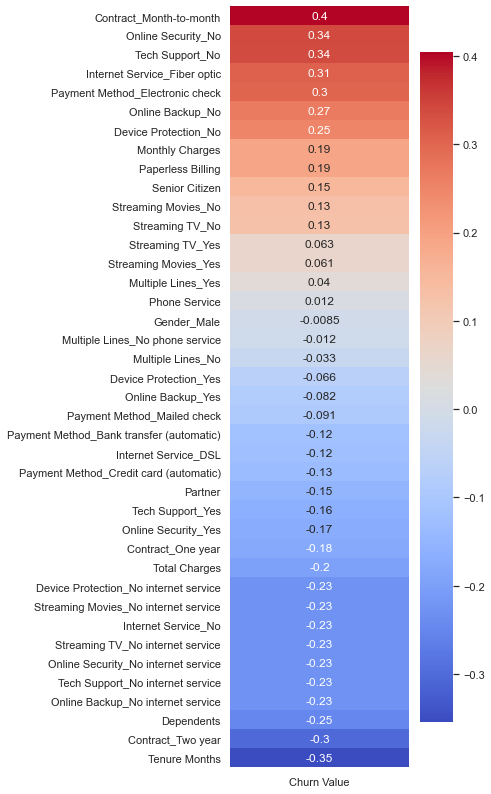

In [36]:
corr_for_target(df, 'Churn Value');


on remarque ci-dessus  monthly contracts et l'absence de certains services
(online security, techsupport) sont corrolés positivement avec churn Value par contre
 tenure months ,  contract_two year et l'absence du service internet sont corrolés negativement avec churn Value

# Modelisation

In [37]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import plot_confusion_matrix, accuracy_score, precision_recall_fscore_support
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

ModuleNotFoundError: No module named 'xgboost'

In [38]:
X = df.drop(["Churn Value"], axis=1)
y = df["Churn Value"]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=10)

In [40]:
#insialisaton d'un dataframe qui garde la trace des modeles
all_scores = pd.DataFrame()

## 1-les fonctions utiles

In [41]:
# This function takes the model, features and actual target values, makes prediction and then prints different metric scores
def model_predictions(name, model, X, y, title):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision, recall, f1, support = precision_recall_fscore_support(y, y_pred, average='binary')
    scores = pd.DataFrame(columns=['Accuracy','Precision','Recall','F1'])
    scores.loc[name] = [accuracy, precision, recall, f1]
    print('----------------------------------------')
    print(title)
    print(scores)
    return scores

In [42]:
# This function plots the Confusion matrix with/without normalization + ROC Curve + Precision-Recall Curve
def model_plots(model, X, y, title):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle(title, fontsize=18)
    plt.subplots_adjust(hspace=0.3)
    axes[0,0].set_title('Confusion Matrix')
    plot_confusion_matrix(model, X, y, display_labels=['No Churn','Churn'], ax=axes[0,0])
    axes[0,1].set_title('Normalized Confusion Matrix')
    plot_confusion_matrix(model, X, y, normalize='true', display_labels=['No Churn','Churn'], ax=axes[0,1])
    axes[1,0].set_title('ROC Curve')
    plot_roc_curve(model, X, y, name='Log.Reg.', ax=axes[1,0])
    axes[1,1].set_title('Precision-Recall Curve')
    plot_precision_recall_curve(model, X, y, name='Log.Reg.', ax=axes[1,1])
    plt.show()

In [43]:
# This function takes the model and it's related parameters as input and returns the best parameters 
# from given set using Grid Search Algorithm (hyperparameter tuning) 
def hyperparam_gridcv(name, model, params):
    gsearch = GridSearchCV(estimator=model, 
                           param_grid=params, 
                           scoring='f1',
                           cv=5,
                           n_jobs = -1)
    gsearch.fit(X_train, y_train)
    print(name, " - Best Parameters: ", gsearch.best_params_)
    return gsearch.best_params_

## a-la regression logistique

In [44]:
# Fit the base model
logreg = LogisticRegression(max_iter=1000, random_state=10)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=10)

----------------------------------------
Logistic Reg. Training Set Scores
        Accuracy  Precision    Recall        F1
LOGREG  0.811528   0.667763  0.579173  0.620321
----------------------------------------
Logistic Reg. Test Set Scores
        Accuracy  Precision    Recall        F1
LOGREG  0.813993   0.683246  0.558887  0.614841


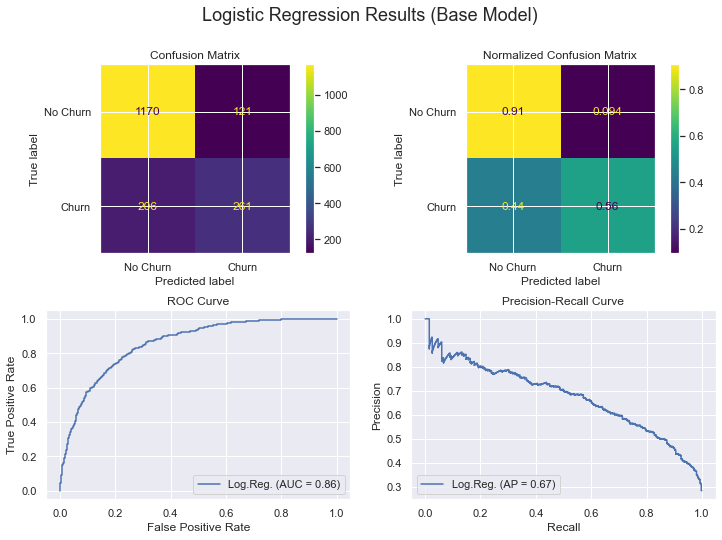

In [45]:
# Get the training and test set's scores
model_predictions('LOGREG', logreg, X_train, y_train, 'Logistic Reg. Training Set Scores')
model_predictions('LOGREG', logreg, X_test, y_test, 'Logistic Reg. Test Set Scores')
# Plot the confusion matrix, ROC curve and PRC curve
model_plots(logreg, X_test, y_test, "Logistic Regression Results (Base Model)")

In [46]:
# Hyperparameter tuning (it is commented as it takes time)
params_logreg = {'penalty':['l1','l2'], 'C':np.arange(0.1, 3, 0.1)}
hyperparam_gridcv('Logistic Regression', logreg, params_logreg)

Logistic Regression  - Best Parameters:  {'C': 1.1, 'penalty': 'l2'}


{'C': 1.1, 'penalty': 'l2'}

----------------------------------------
Logistic Reg. Test Set Scores
        Accuracy  Precision    Recall        F1
LOGREG  0.814562   0.685039  0.558887  0.615566


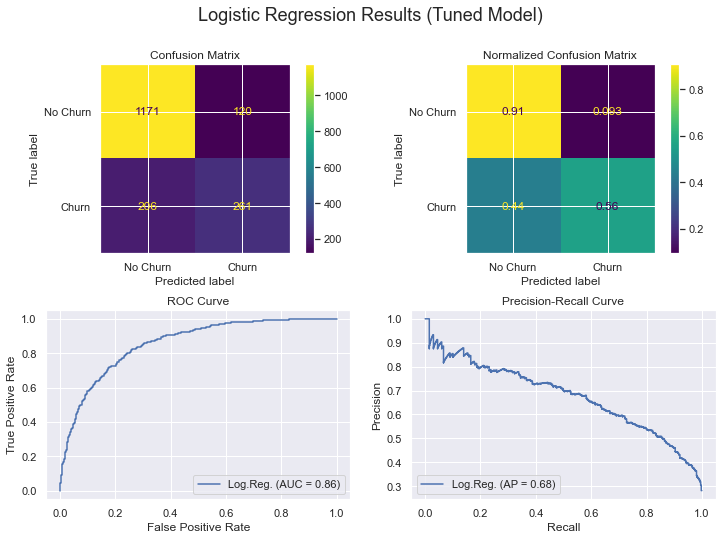

In [47]:
logreg = LogisticRegression(max_iter=1000, C=2.7, penalty='l2', random_state=10)
logreg.fit(X_train, y_train)

logreg_results = model_predictions('LOGREG', logreg, X_test, y_test, 'Logistic Reg. Test Set Scores')
all_scores = all_scores.append(logreg_results)

model_plots(logreg, X_test, y_test, "Logistic Regression Results (Tuned Model)")

## b-KNN

In [48]:
# Fit the base model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

----------------------------------------
KNN Training Set Scores
     Accuracy  Precision    Recall        F1
KNN  0.839401    0.72361  0.640514  0.679531
----------------------------------------
KNN Test Set Scores
     Accuracy  Precision    Recall        F1
KNN  0.767349   0.566514  0.528908  0.547065


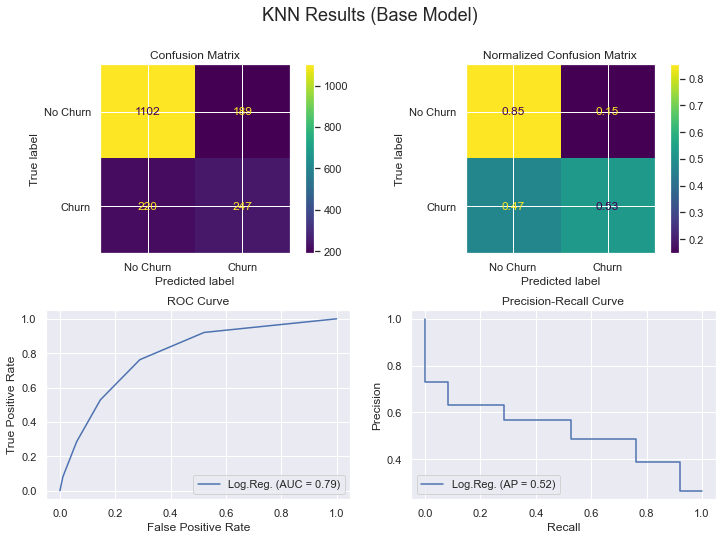

In [49]:
# Get the training and test set's scores
model_predictions('KNN', knn, X_train, y_train, 'KNN Training Set Scores')
model_predictions('KNN', knn, X_test, y_test, 'KNN Test Set Scores')
# Plot the confusion matrix, ROC curve and PRC curve
model_plots(knn, X_test, y_test, "KNN Results (Base Model)")

In [50]:
# Hyperparameter tuning
params_knn = {'n_neighbors':np.arange(3, 25, 1), 
              'metric':['euclidean','manhattan','minkowski']}
hyperparam_gridcv('K-Nearest Neighbors', knn, params_knn)

K-Nearest Neighbors  - Best Parameters:  {'metric': 'manhattan', 'n_neighbors': 19}


{'metric': 'manhattan', 'n_neighbors': 19}

----------------------------------------
KNN Test Set Scores
     Accuracy  Precision    Recall        F1
KNN  0.789534   0.615202  0.554604  0.583333


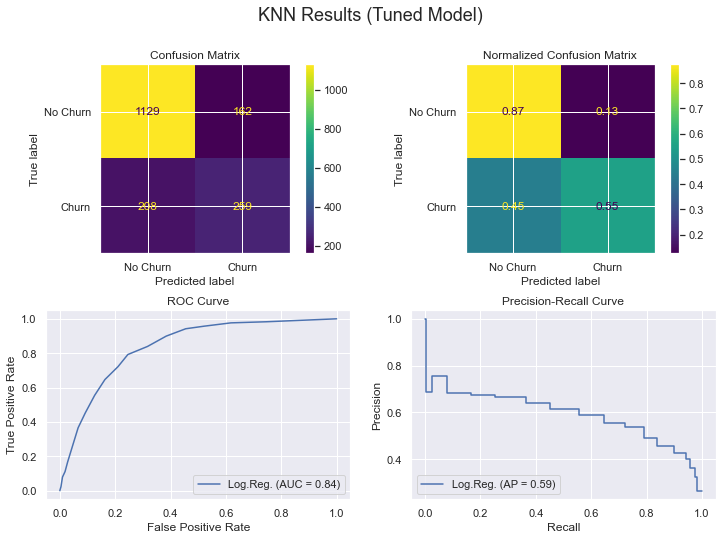

In [51]:
knn = KNeighborsClassifier(n_neighbors=19, metric='manhattan')
knn.fit(X_train, y_train)

knn_results = model_predictions('KNN', knn, X_test, y_test, 'KNN Test Set Scores')
all_scores = all_scores.append(knn_results)

model_plots(knn, X_test, y_test, "KNN Results (Tuned Model)")

## c-Random forest

In [52]:
# Fit the base model
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

----------------------------------------
Random Forest Training Set Scores
          Accuracy  Precision    Recall        F1
RND.FOR.  0.997535   0.994306  0.996434  0.995369
----------------------------------------
Random Forest Test Set Scores
          Accuracy  Precision    Recall        F1
RND.FOR.  0.794084   0.661538  0.460385  0.542929


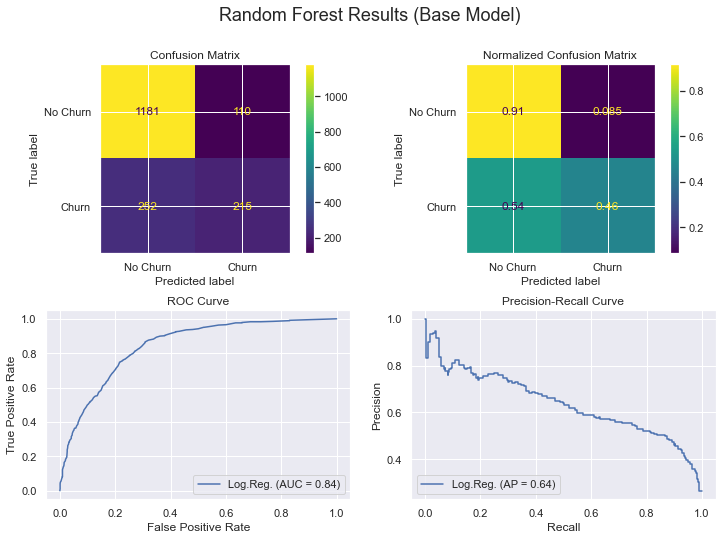

In [53]:
# Get the training and test set's scores
model_predictions('RND.FOR.', rf, X_train, y_train, 'Random Forest Training Set Scores')
model_predictions('RND.FOR.', rf, X_test, y_test, 'Random Forest Test Set Scores')
# Plot the confusion matrix, ROC curve and PRC curve
model_plots(rf, X_test, y_test, "Random Forest Results (Base Model)")

In [56]:
# Hyperparameter tuning
params_rf = {'n_estimators':[100, 500, 1000, 1500],
             'max_depth':np.append(np.arange(10, 60, 10), None),
             'class_weight':[None, 'balanced', 'balanced_subsample'],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 5]
            }

#hyperparam_gridcv('Random Forest', rf, params_rf)

----------------------------------------
Random Forest Test Set Scores
          Accuracy  Precision    Recall        F1
RND.FOR.  0.794653   0.591379  0.734475  0.655205


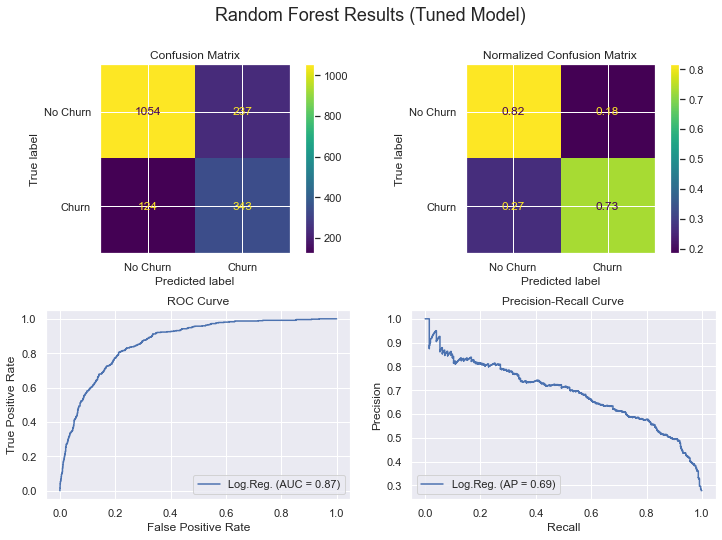

In [55]:
rf = RandomForestClassifier(n_estimators=100, 
                            max_depth=10, 
                            max_features='auto', 
                            min_samples_split=5,
                            min_samples_leaf=2, 
                            class_weight='balanced_subsample',
                            random_state=10)
rf.fit(X_train, y_train)

rf_results = model_predictions('RND.FOR.', rf, X_test, y_test, 'Random Forest Test Set Scores')
all_scores = all_scores.append(rf_results)

model_plots(rf, X_test, y_test, "Random Forest Results (Tuned Model)")

<AxesSubplot:ylabel='feature'>

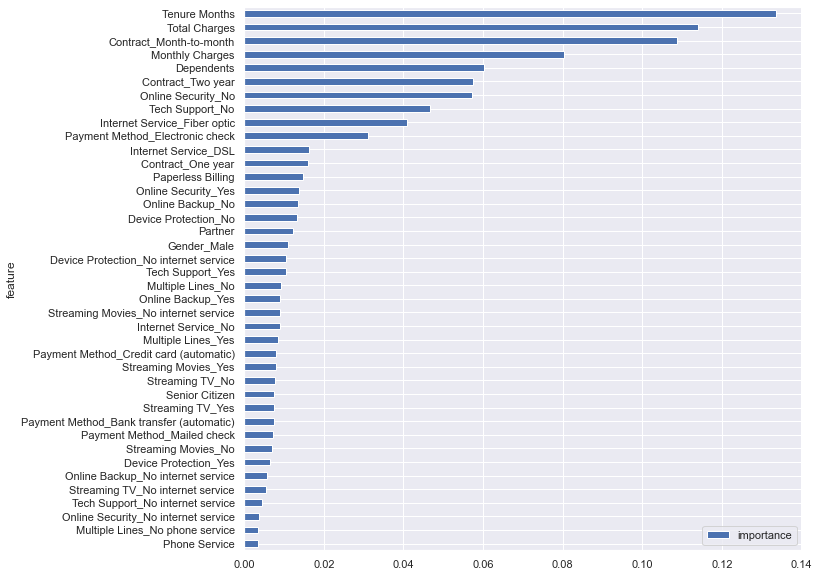

In [58]:
#have a look at the importance of each feature.
features = pd.DataFrame()
features['feature'] = X.columns
features['importance'] = rf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(10, 10))

OBSERVATIONS

le modele ajusté a une perfomance legemerment superieur aux deux premiers algorithmes
les premiers alogorithmes peuvent predire que 50% des clients qui vont quitter parcontre le random Forest peut predire jusqu'a 75% des churners.

D'apres features Importance Tenure monthes,total charges, contact month_to_month and monthly charges sont les variables les plus importantes dans la prediction

## d-SUPPORT VECTOR MACHINES

In [59]:
# Fit the base model
svm = SVC(random_state=10)
svm.fit(X_train, y_train)

SVC(random_state=10)

----------------------------------------
SVM Training Set Scores
     Accuracy  Precision    Recall       F1
SVM  0.821578   0.715219  0.546362  0.61949
----------------------------------------
SVM Test Set Scores
     Accuracy  Precision    Recall        F1
SVM  0.807736   0.691395  0.498929  0.579602


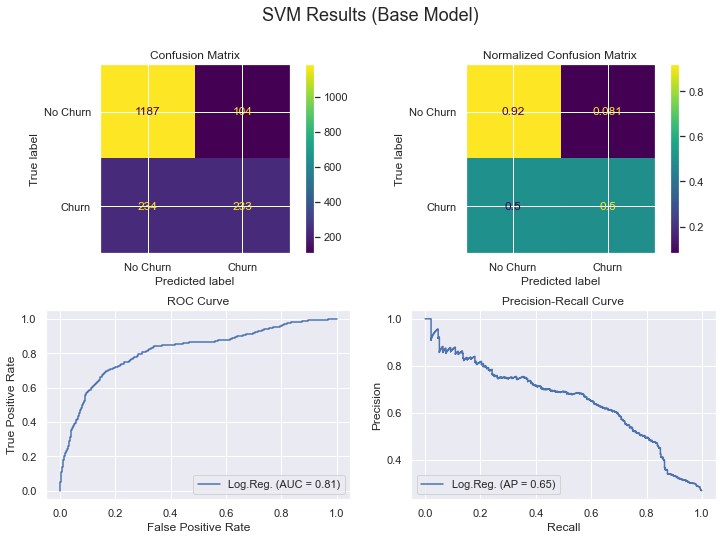

In [60]:
# Get the training and test set's scores
model_predictions('SVM', svm, X_train, y_train, 'SVM Training Set Scores')
model_predictions('SVM', svm, X_test, y_test, 'SVM Test Set Scores')
# Plot the confusion matrix, ROC curve and PRC curve
model_plots(svm, X_test, y_test, "SVM Results (Base Model)")

In [61]:
# Hyperparameter tuning
params_svm = {'C':np.arange(0.1, 3, 0.1), 'kernel':['linear', 'poly', 'rbf']}
#hyperparam_gridcv('SVM', svm, params_svm)

----------------------------------------
SVM Test Set Scores
     Accuracy  Precision    Recall        F1
SVM   0.81058   0.675393  0.552463  0.607774


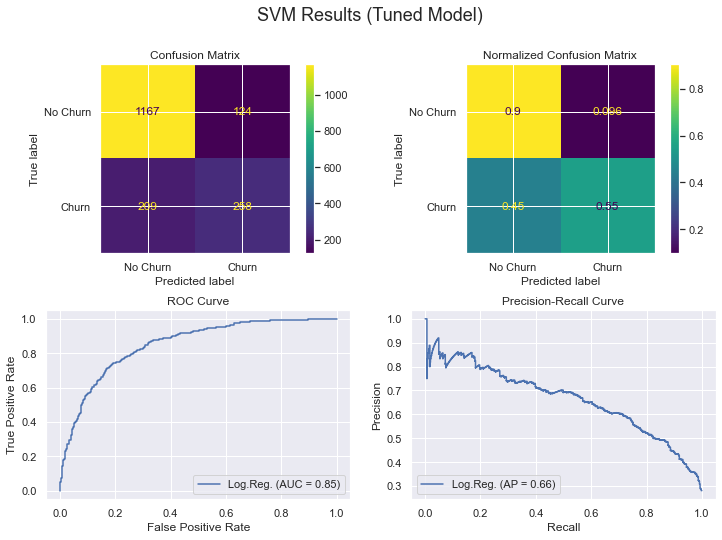

In [62]:
svm = SVC(C=0.3,
          kernel='linear',
          random_state=10)
svm.fit(X_train, y_train)

svm_results = model_predictions('SVM', svm, X_test, y_test, 'SVM Test Set Scores')
all_scores = all_scores.append(svm_results)

model_plots(svm, X_test, y_test, "SVM Results (Tuned Model)")

OBSERVATION

Le modèle ajusté a des résultats légèrement meilleurs que le modèle de base, mais dans l'ensemble, 
il est médiocre pour prédire le taux de désabonnement des clients comme la régression logistique et le modèle KNN.

## f-XGBOOST

In [63]:
# Fit the base model
xgb = XGBClassifier(random_state=10)
xgb.fit(X_train, y_train)

NameError: name 'XGBClassifier' is not defined

In [ ]:
# Get the training and test set's scores
model_predictions('XGB', xgb, X_train, y_train, 'XGB Training Set Scores')
model_predictions('XGB', xgb, X_test, y_test, 'XGB Test Set Scores')
# Plot the confusion matrix, ROC curve and PRC curve
model_plots(xgb, X_test, y_test, "XGB Results (Base Model)")

In [ ]:
# Hyperparameter tuning
params_xgb = {'learning_rate': [0.01, 0.05, 0.1],
              'max_depth': [3, 5, 7, 10], 
              'min_child_weight': [1, 5, 10],
              'subsample': [0.5, 0.7, 0.9],
              'colsample_bytree': [0.6, 0.8, 1.0],
              'gamma': [0, 0.05, 0.1],
              'scale_pos_weight':[1,2,3]}
#hyperparam_randcv('XGB', xgb, params_xgb)

In [ ]:
xgb = XGBClassifier(n_estimators=100,
                    learning_rate=0.05,
                    max_depth=5,
                    min_child_weight=10,
                    subsample=0.7,
                    colsample_bytree=0.8,
                    gamma=0.05,
                    scale_pos_weight=2,
                    random_state=10)
xgb.fit(X_train, y_train)

xgb_results = model_predictions('XGB', xgb, X_test, y_test, 'XGB Test Set Scores')
all_scores = all_scores.append(xgb_results)

model_plots(xgb, X_test, y_test, "XGB Results (Tuned Model)")

## e-LIGHT GBM

In [ ]:
# Fit the base model
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)

In [ ]:
# Get the training and test set's scores
model_predictions('LGBM', lgbm, X_train, y_train, 'LGBM Training Set Scores')
model_predictions('LGBM', lgbm, X_test, y_test, 'LGBM Test Set Scores')
# Plot the confusion matrix, ROC curve and PRC curve
model_plots(lgbm, X_test, y_test, "LGBM Results (Base Model)")

In [ ]:
# Hyperparameter tuning
params_lgbm = {'learning_rate': [0.01, 0.05, 0.1],
               'n_estimators' : [100, 1000, 2000],
               'max_depth': [-1, 3, 5, 7],
               'min_child_weight': [1, 10, 100],
               'subsample': [0.5, 0.7, 0.9],
               'colsample_bytree': [0.6, 0.8, 1.0],
               'reg_alpha': [0, 1, 5, 10],
               'scale_pos_weight':[1, 1.5, 2]}
#hyperparam_randcv('LGBM', lgbm, params_lgbm)

In [ ]:
lgbm = LGBMClassifier(n_estimators=2000,
                    learning_rate=0.05,
                    min_child_weight=100,
                    max_depth=-1,
                    subsample=0.9,
                    colsample_bytree=1,
                    scale_pos_weight=2,
                    reg_alpha=5,
                    random_state=10)
lgbm.fit(X_train, y_train)

lgbm_results = model_predictions('LGBM', lgbm, X_test, y_test, 'LGBM Test Set Scores')
all_scores = all_scores.append(lgbm_results)

model_plots(lgbm, X_test, y_test, "LGBM Results (Tuned Model)")

In [ ]:
all_scores.sort_values(by='F1', ascending=False)